# Libraries

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import PIL.Image as pil_image
import seaborn as sns

from kaggle_clothing_attributes.config import load_config
from kaggle_clothing_attributes.consts import LABEL_MAPPING, COLOR_MAPPING
from kaggle_clothing_attributes.preprocess import load_labels_from_directory
from kaggle_clothing_attributes.utils import show_image_with_labels

# Constants

In [2]:
CONFIG = load_config()
images_dir = Path(CONFIG["dataset"]["images_dir"])
labels_dir = Path(CONFIG["dataset"]["labels_dir"])

# Labels Inspection

In [3]:
labels_df = load_labels_from_directory(labels_dir)
labels_df = labels_df.reindex(columns=LABEL_MAPPING.keys())

In [4]:
labels_df.head()

,necktie,collar,gender,placket,skin_exposure,scarf,pattern_solid,pattern_floral,pattern_spot,pattern_graphics,...,blue,purple,brown,white,gray,black,many_colors,sleevelength,neckline,category
0,2,2,1,2,1,1,<NA>,1,<NA>,1,...,1,1,1,1,1,2,1,3,1,5
1,1,<NA>,2,2,1,1,1,1,1,1,...,1,1,1,1,2,1,1,3,2,<NA>
2,1,2,1,2,1,2,2,1,1,1,...,1,1,1,1,2,2,1,3,<NA>,4
3,2,2,2,2,1,1,2,1,1,1,...,1,1,1,1,1,2,1,3,<NA>,5
4,1,1,2,1,2,1,2,1,1,1,...,1,1,1,2,1,1,1,1,<NA>,6


In [5]:
print(f"Shape of the label dataframe: {labels_df.shape}")

Shape of the label dataframe: (1856, 26)


In [6]:
# labels_df.to_csv(CONFIG["artifacts"]["labels_path"])

In [7]:
# Let's check the number of the original image.
images = sorted(list((images_dir).glob("*.jpg")))  # Glob doesn't sort by file name.
print(f"Number of images: {len(images)}")

Number of images: 1856


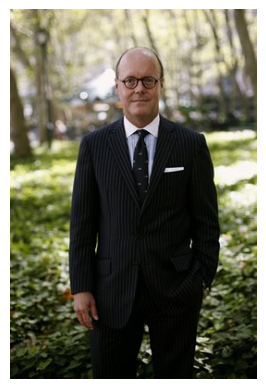

Necktie: Has necktie
Collar: Has collar
Gender: Male
Placket: Has placket
Skin Exposure: Low exposure
Scarf: No scarf
Pattern Solid: Unknown
Pattern Floral: No
Pattern Spot: Unknown
Pattern Graphics: No
Pattern Plaid: No
Pattern Stripe: Unknown
Red: No
Yellow: No
Green: No
Cyan: No
Blue: No
Purple: No
Brown: No
White: No
Gray: No
Black: Yes
Many Colors: No
Sleevelength: Long sleeves
Neckline: V-shape
Category: Suit


In [8]:
idx = 0
image_array = pil_image.open(images[idx])
show_image_with_labels(image_array, labels_df, idx)

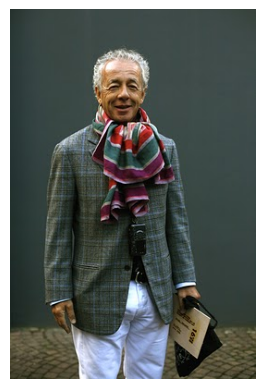

Necktie: No necktie
Collar: Has collar
Gender: Male
Placket: Has placket
Skin Exposure: Low exposure
Scarf: Has scarf
Pattern Solid: Unknown
Pattern Floral: Unknown
Pattern Spot: Unknown
Pattern Graphics: Unknown
Pattern Plaid: Unknown
Pattern Stripe: Unknown
Red: No
Yellow: No
Green: No
Cyan: No
Blue: No
Purple: No
Brown: No
White: No
Gray: Yes
Black: No
Many Colors: No
Sleevelength: Long sleeves
Neckline: V-shape
Category: Unknown


In [9]:
idx = 20
image_array = pil_image.open(images[idx])
show_image_with_labels(image_array, labels_df, idx)

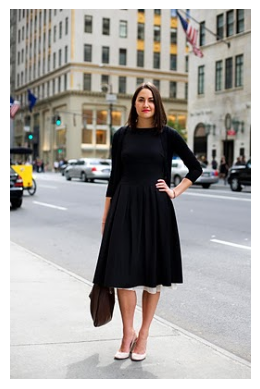

Necktie: No necktie
Collar: No collar
Gender: Female
Placket: No placket
Skin Exposure: Low exposure
Scarf: No scarf
Pattern Solid: Yes
Pattern Floral: No
Pattern Spot: No
Pattern Graphics: No
Pattern Plaid: No
Pattern Stripe: No
Red: No
Yellow: No
Green: No
Cyan: No
Blue: No
Purple: No
Brown: No
White: No
Gray: No
Black: Yes
Many Colors: No
Sleevelength: Short sleeves
Neckline: Round
Category: Dress


In [10]:
idx = 100
image_array = pil_image.open(images[idx])
show_image_with_labels(image_array, labels_df, idx)

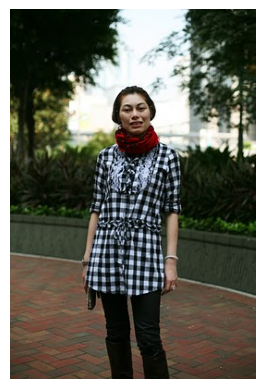

Necktie: No necktie
Collar: Unknown
Gender: Female
Placket: No placket
Skin Exposure: Low exposure
Scarf: Has scarf
Pattern Solid: No
Pattern Floral: No
Pattern Spot: No
Pattern Graphics: No
Pattern Plaid: Yes
Pattern Stripe: Unknown
Red: No
Yellow: No
Green: No
Cyan: No
Blue: No
Purple: No
Brown: No
White: Yes
Gray: No
Black: Yes
Many Colors: No
Sleevelength: Short sleeves
Neckline: Unknown
Category: Unknown


In [11]:
idx = 200
image_array = pil_image.open(images[idx])
show_image_with_labels(image_array, labels_df, idx)

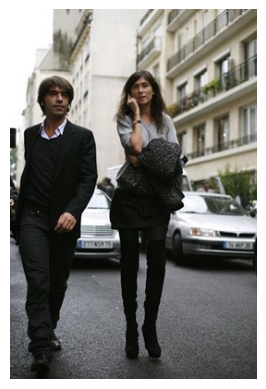

Necktie: No necktie
Collar: Unknown
Gender: Unknown
Placket: Has placket
Skin Exposure: Low exposure
Scarf: No scarf
Pattern Solid: Yes
Pattern Floral: No
Pattern Spot: No
Pattern Graphics: No
Pattern Plaid: No
Pattern Stripe: No
Red: No
Yellow: No
Green: No
Cyan: No
Blue: No
Purple: No
Brown: No
White: No
Gray: No
Black: Yes
Many Colors: No
Sleevelength: Long sleeves
Neckline: Round
Category: Unknown


In [12]:
idx = 354
image_array = pil_image.open(images[idx])
show_image_with_labels(image_array, labels_df, idx)

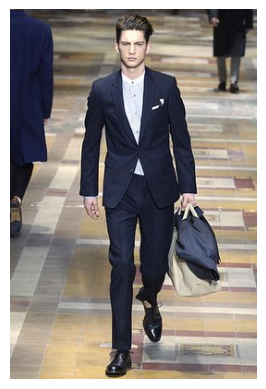

Necktie: No necktie
Collar: Has collar
Gender: Male
Placket: Has placket
Skin Exposure: Low exposure
Scarf: No scarf
Pattern Solid: Yes
Pattern Floral: No
Pattern Spot: No
Pattern Graphics: No
Pattern Plaid: No
Pattern Stripe: No
Red: No
Yellow: No
Green: No
Cyan: No
Blue: Yes
Purple: No
Brown: No
White: Yes
Gray: No
Black: No
Many Colors: No
Sleevelength: Long sleeves
Neckline: Unknown
Category: Suit


In [13]:
idx = 900
image_array = pil_image.open(images[idx])
show_image_with_labels(image_array, labels_df, idx)

The labels are correct given the chosen images. Next, let's look at the distribution of the labels.

# Label Distribution

In [14]:
mapped_labels_df = labels_df.apply(
    lambda x: x.map(LABEL_MAPPING[x.name]), axis=0
).replace({None: "Unknown"})
n_images = labels_df.shape[0]

In [15]:
def plot_label_distribution(label_name: str) -> None:
    """
    Plots the distribution of a label.

    Parameters:
        label_name (str): The name of the label.
    """
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(
        y=mapped_labels_df[label_name].value_counts().index,
        x=mapped_labels_df[label_name].value_counts(normalize=True).values,
        hue=mapped_labels_df[label_name].value_counts().index,
        orient="h",
        palette=dict(COLOR_MAPPING),
        ax=ax,
    )
    ax.set_xlim(0, 1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))
    for c in ax.containers:
        ax.bar_label(c, fmt=lambda x: f"{x * 100: 0.1f}%")
    plt.show()

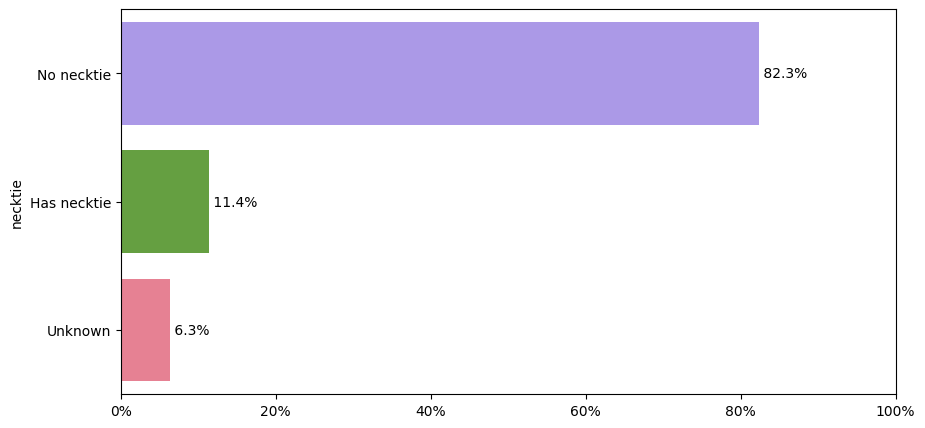

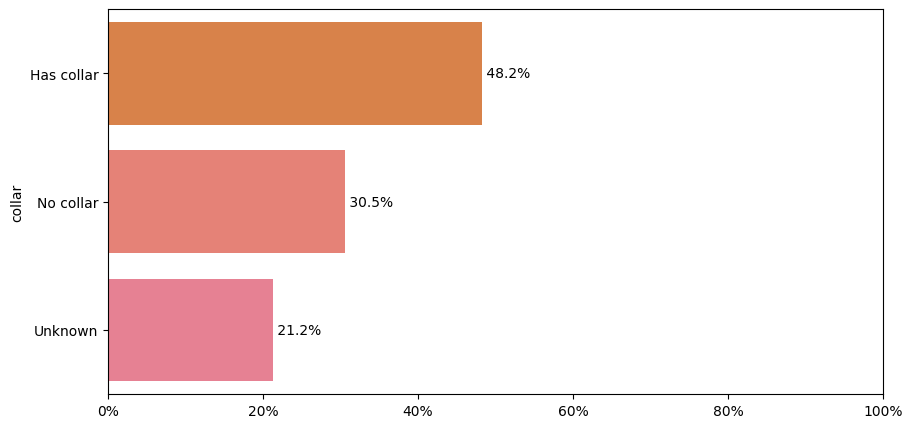

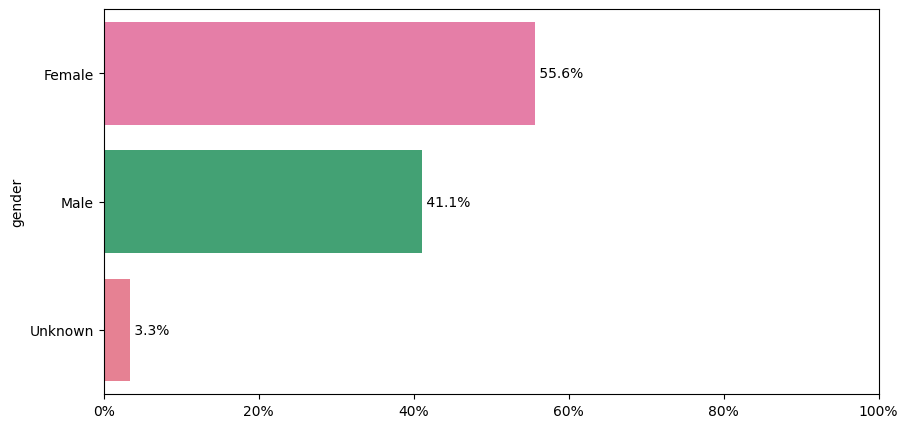

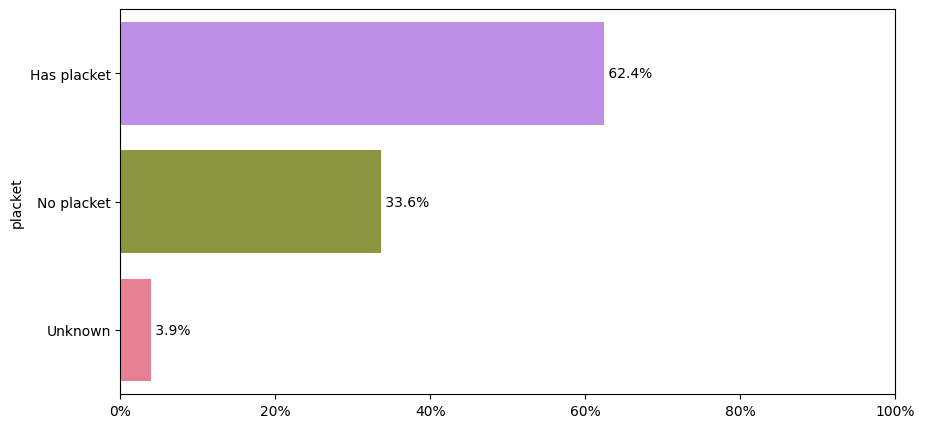

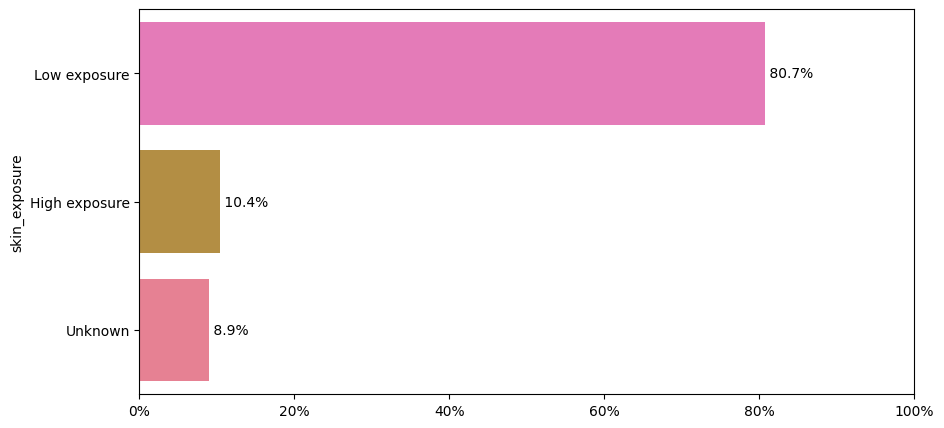

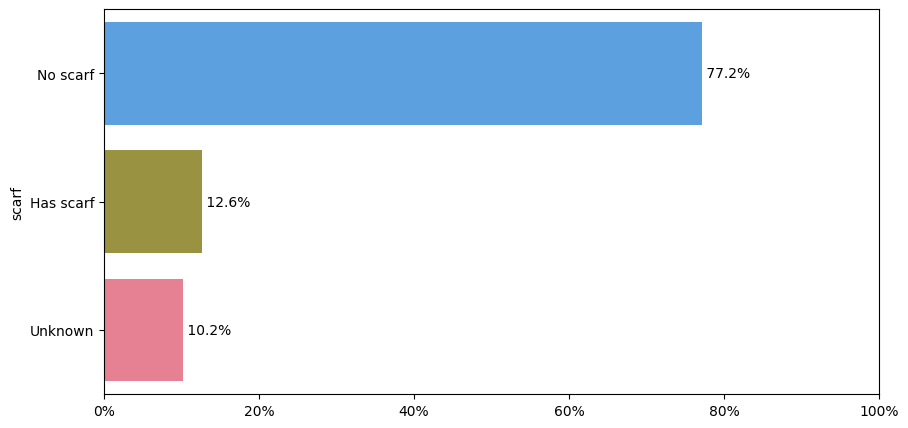

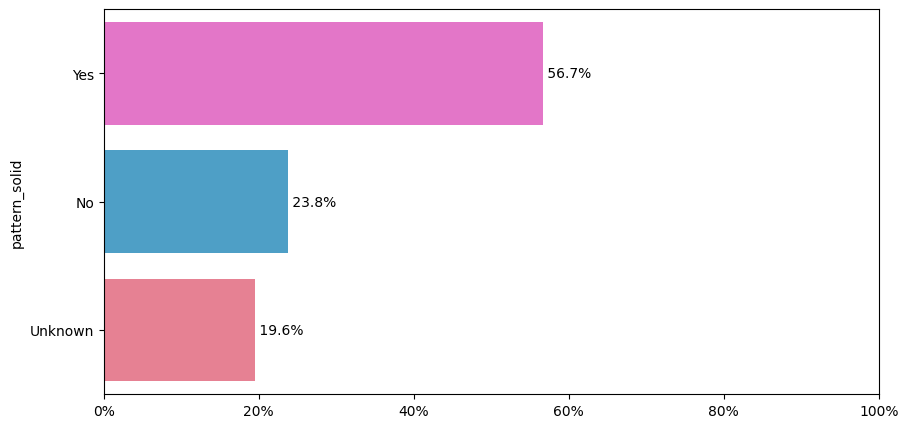

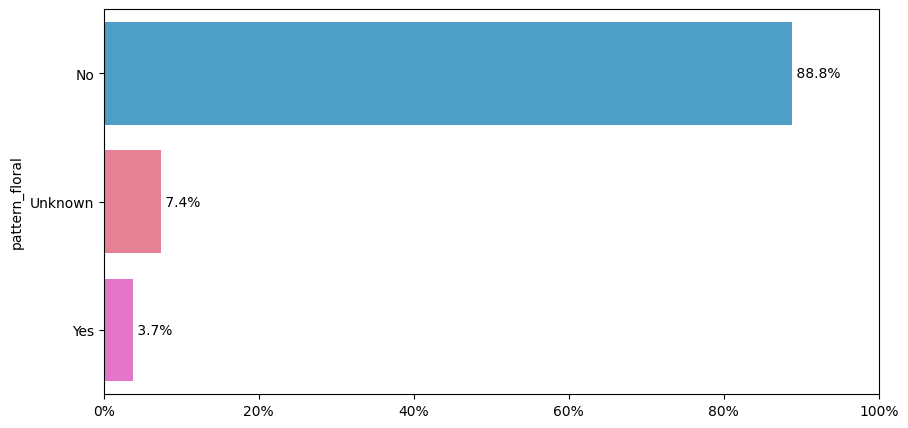

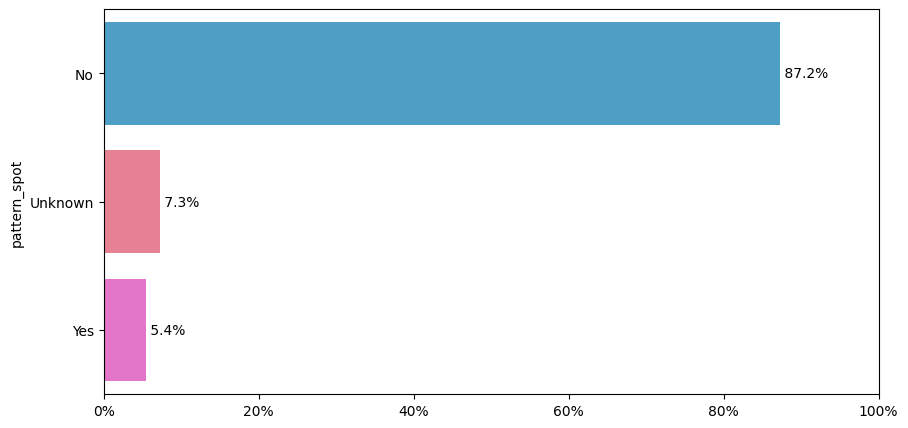

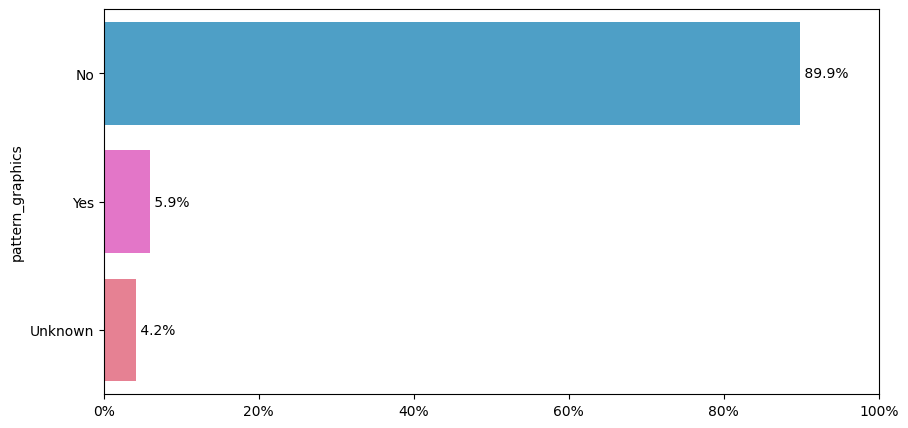

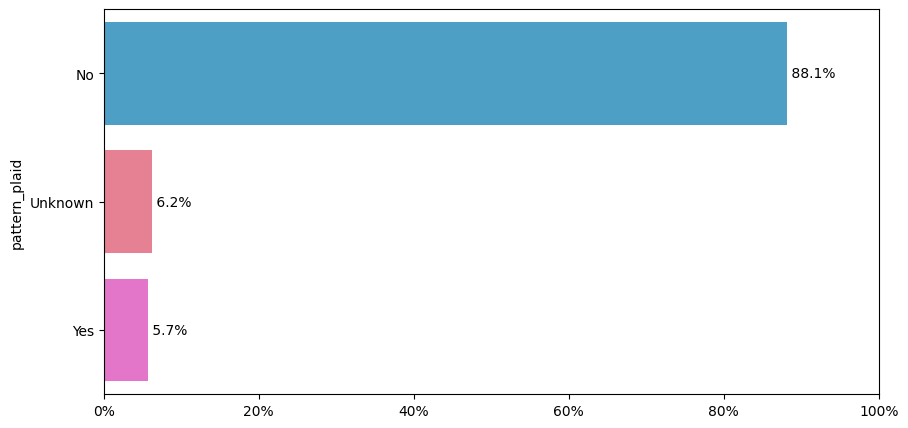

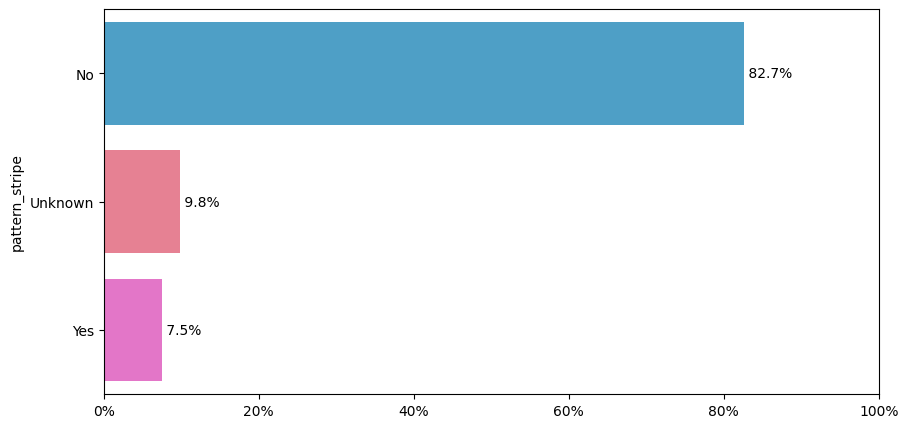

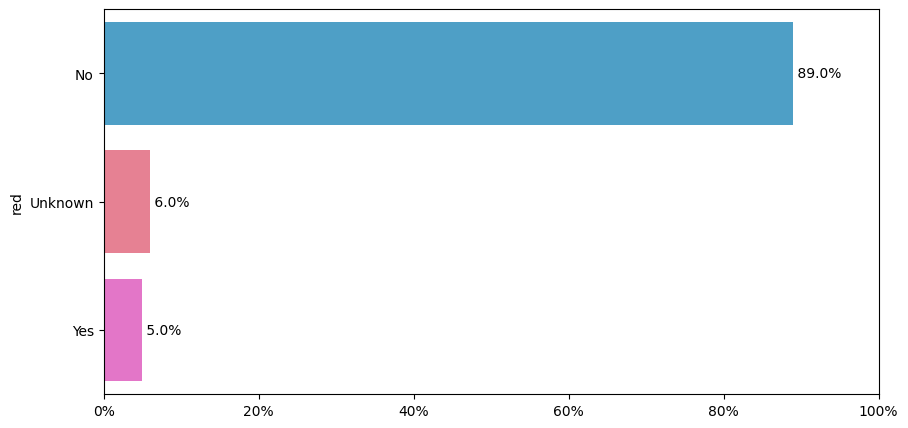

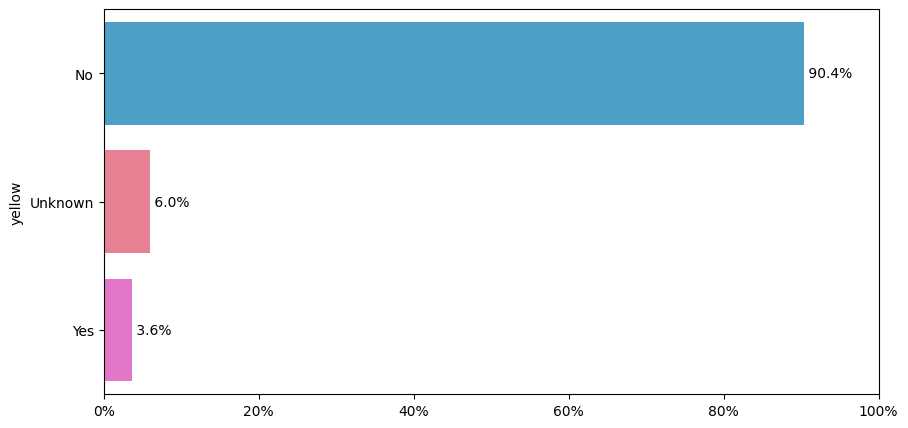

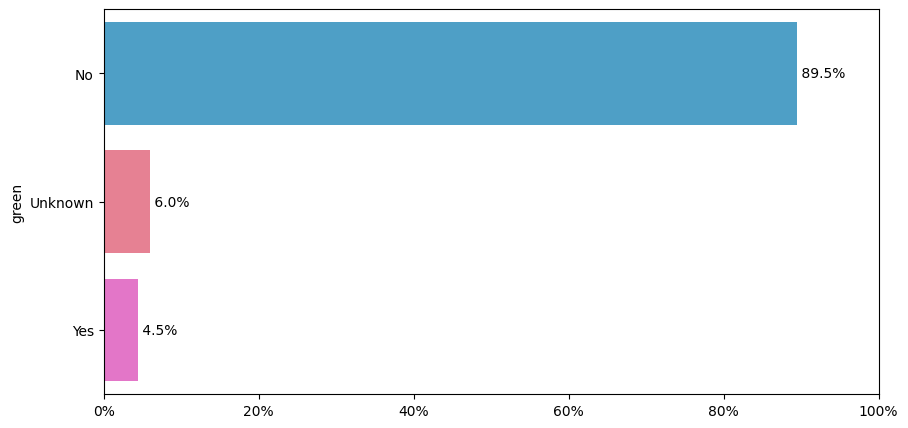

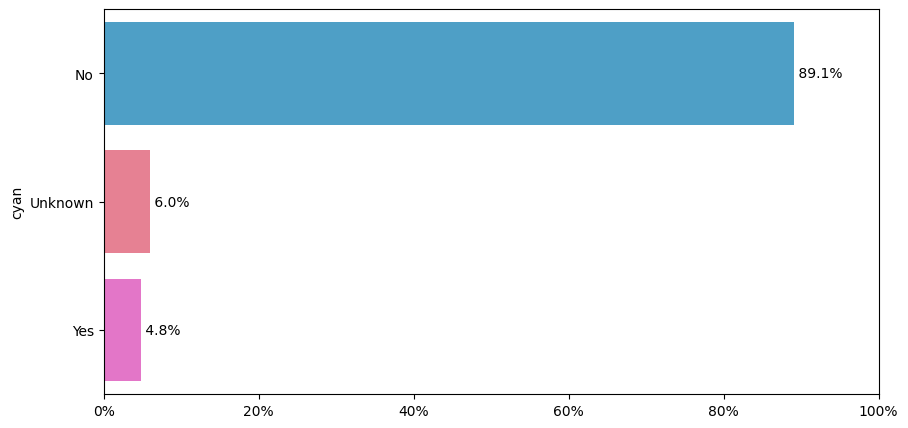

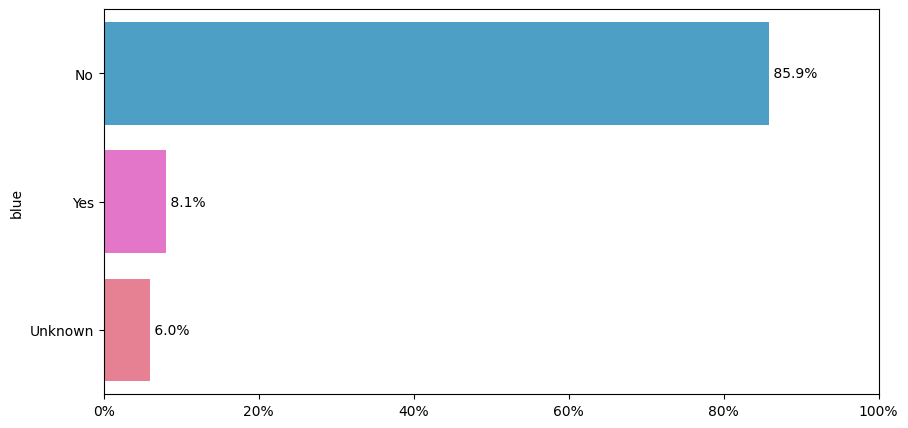

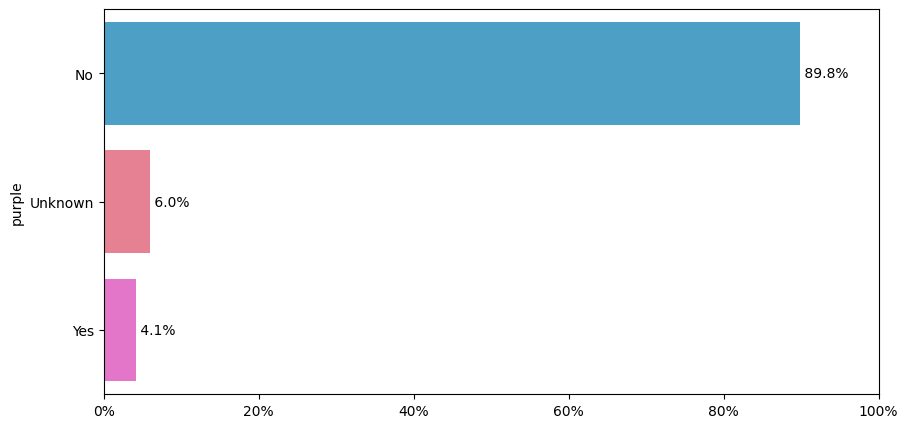

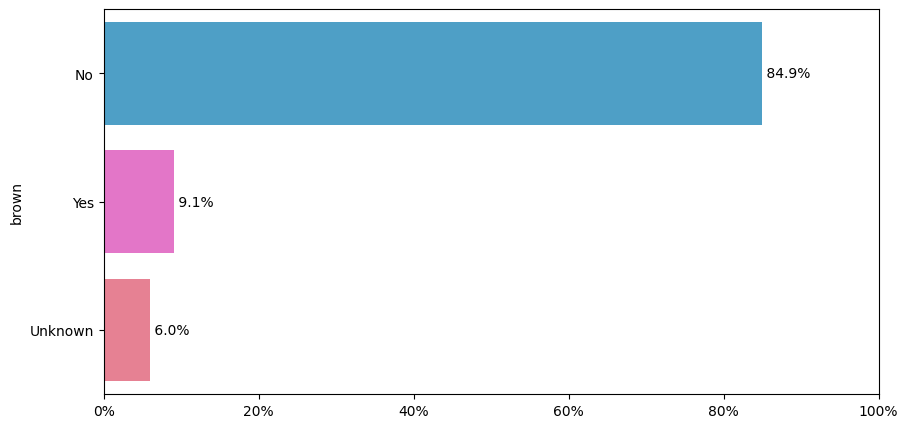

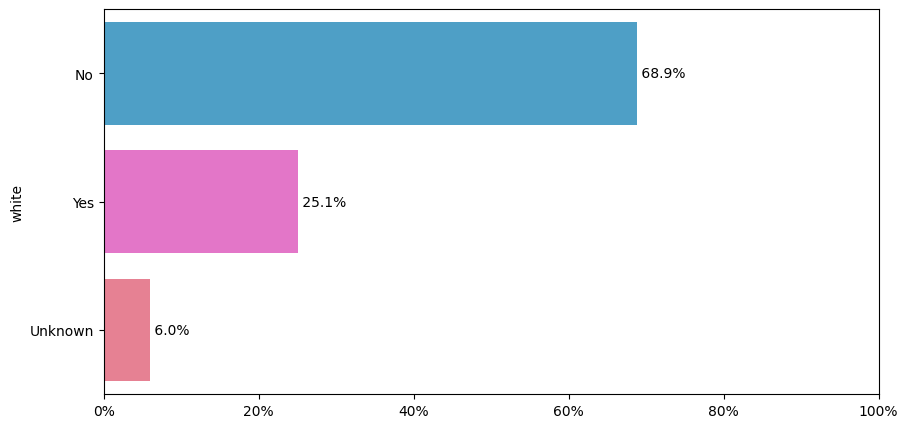

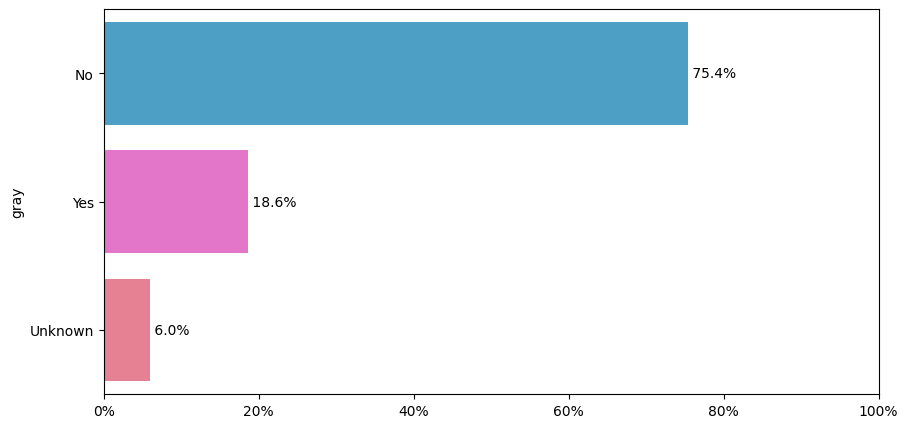

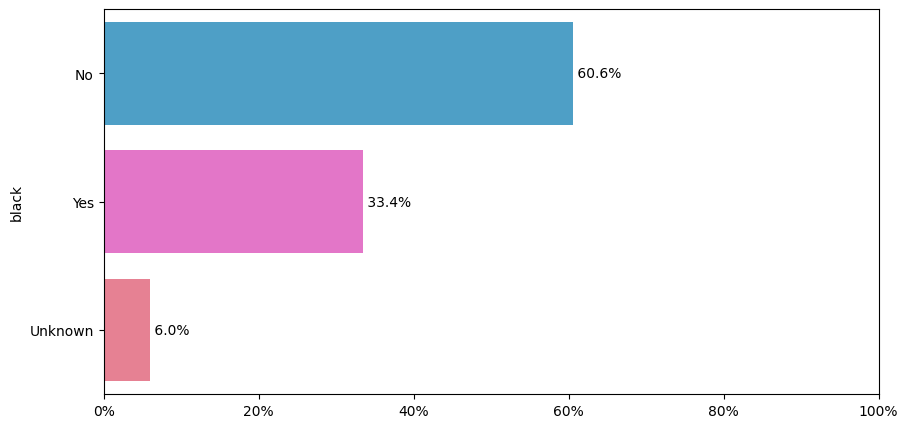

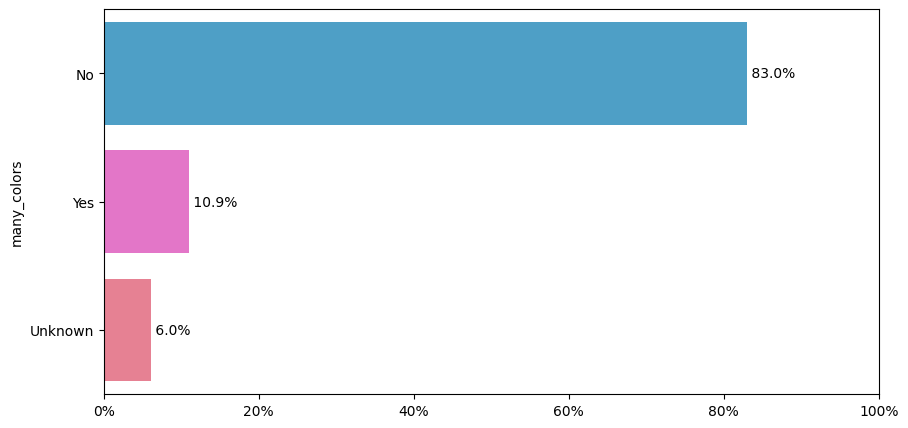

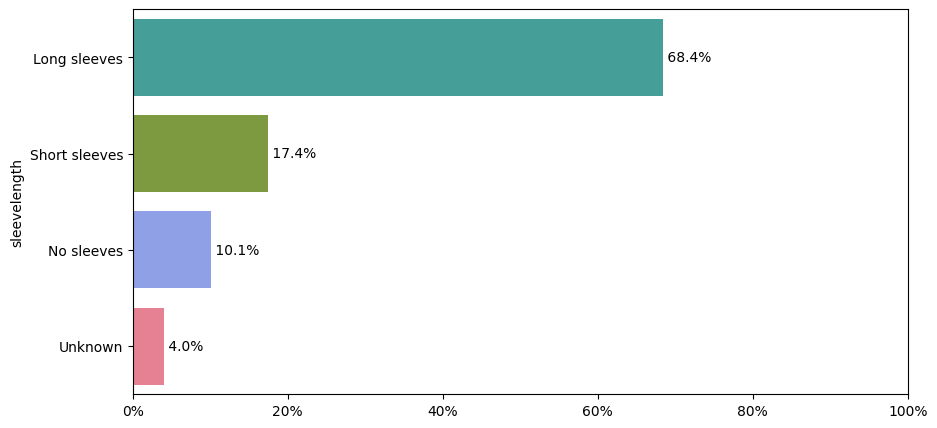

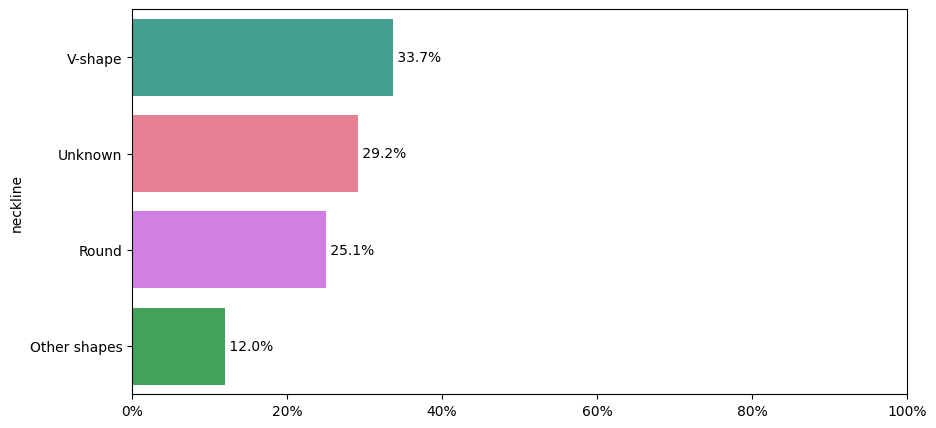

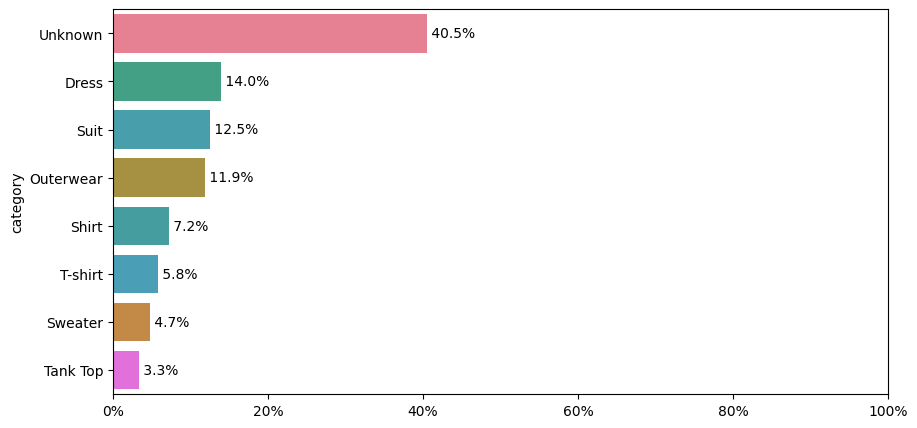

In [16]:
for label in LABEL_MAPPING.keys():
    plot_label_distribution(label)

# Notes
- Found a sample with multiple subjects. There might be more.
  - Index: 354
- Some labels have high amount of unknown values.
  - Label: "category" at 40.5%, "neckline" at 29.2%, and "pattern_solid" at 19.6%.